In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.manifold import TSNE
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import sys
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow_addons.metrics import RSquare
from keras.initializers import he_normal, glorot_normal
from sklearn.preprocessing import OneHotEncoder
from datasets import load_dataset

## Funcions

In [1]:
def load_word_embeddings(embedding_path):
    word_embeddings = {}
    with open(embedding_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            word_embeddings[word] = vector
    return word_embeddings

def preprocess(text, stop_words, punctuation):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation]
    return words

def compute_document_embedding(words, word_embeddings):
    word_vectors = []
    for word in words:
        if word in word_embeddings:
            word_vectors.append(word_embeddings[word])
    if len(word_vectors) == 0:
        return None
    else:
        return np.mean(word_vectors, axis=0)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_labels(y):
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(y)
    return y, ohe.categories_

def plot_training_curve(history,name):
    #Generate the accuracy/loss plot during training
    print(history.history)
    plt.plot(history.history['precision'], label='precision')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['recall'],label='recall')
    plt.plot(history.history['loss'], label='loss')
    plt.title('Model Training')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.savefig(f'./{name}Loss')
    plt.show()

def mlpClassifier(X_train, y_train, X_val, y_val, name,neuron,activ):
    y_train, classes = one_hot_encode_labels(y_train)
    classes = classes[0]
    y_val, _ = one_hot_encode_labels(y_val)

    print(y_train.shape, y_val.shape, classes, len(classes))

    model = Sequential(
            [Dense(neuron,activation=activ, kernel_initializer=he_normal())] + #input_size??
            [Dense(len(classes),activation='softmax')]
        )
    
    learning_rate = 0.001
    adam = Adam(learning_rate=learning_rate)

    model.compile(loss='categorical_crossentropy', 
                  optimizer=adam, 
                  metrics=[tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
                           tf.keras.metrics.Recall(name='recall')])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size=64)
    plot_training_curve(history,name)

    # Test the model
    predictions = model.predict(X_val)
    #plot_decision_boundary(model,predictions,y_val)
    
    #print(f'### MLP - {name} ###')

    '''fig, ax = plt.subplots()
    ax.scatter(predictions, y_val, edgecolors=(0, 0, 1))
    ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=3)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.savefig(f'./{name}')
    plt.show()'''

    model.summary()
    return predictions, classes

## Dades

In [ ]:
dataset = load_dataset("projecte-aina/tecla")

In [15]:
train = dataset['train'] #datasets.dataset_dict.DatasetDict
train = train[0:len(train)] # canvia format de dataset a diccionari

validation = dataset['validation']
validation = validation[0:len(validation)] # canvia format de dataset a diccionari

test = dataset['test']
test = test[0:len(test)] # canvia format de dataset a diccionari

#convertir a Dataframe
df_tr = pd.DataFrame(train)
df_val = pd.DataFrame(validation)
df_ts = pd.DataFrame(test)

### Carregar embedings de Glove
En els apartats obligatoris no hem elegit Glove com a model preentrenat d'embedings, per això en aquesta part opcional hem volgut utilitzar-lo.

In [12]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

embedding_path = 'glove.6B.300d.txt'
word_embeddings = load_word_embeddings(embedding_path)

In [16]:
df_tr['emb'] = None
for i,text in enumerate(df_tr['text']):
    df_tr['emb'][i] = compute_document_embedding(preprocess(text, stop_words=stop_words, punctuation=punctuation), word_embeddings=word_embeddings)

df_val['emb'] = None
for i,text in enumerate(df_val['text']):
    df_val['emb'][i] = compute_document_embedding(preprocess(text, stop_words=stop_words, punctuation=punctuation), word_embeddings=word_embeddings)

df_ts['emb'] = None
for i,text in enumerate(df_val['text']):
    df_ts['emb'][i] = compute_document_embedding(preprocess(text, stop_words=stop_words, punctuation=punctuation), word_embeddings=word_embeddings)

C:\Users\llumf\AppData\Local\Temp\ipykernel_5644\3692511756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['emb'][i] = compute_document_embedding(preprocess(text, stop_words=stop_words, punctuation=punctuation), word_embeddings=word_embeddings)
C:\Users\llumf\AppData\Local\Temp\ipykernel_5644\3692511756.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['emb'][i] = compute_document_embedding(preprocess(text, stop_words=stop_words, punctuation=punctuation), word_embeddings=word_embeddings)
C:\Users\llumf\AppData\Local\Temp\ipykernel_5644\3692511756.py:11: SettingWithCopyWarning: 
A value is trying to 

In [17]:
def asignar_etiqueta(valor):
    if valor == 0:
        return 'Societat'
    elif valor == 1:
        return 'Política'
    elif valor == 2:
        return 'Economia'
    elif valor == 3:
        return 'Cultura'
    else:
        return 'Otro'

# Aplicar la función a la columna 'columna' y crear una nueva columna 'etiqueta'
df_tr['etiqueta'] = df_tr['label1'].map(asignar_etiqueta)
df_val['etiqueta'] = df_val['label1'].map(asignar_etiqueta)
df_ts['etiqueta'] = df_ts['label1'].map(asignar_etiqueta)


In [18]:
X_train = df_tr['emb']
y_train = df_tr['etiqueta']
X_val = df_val['emb']
y_val = df_val['etiqueta']
X_test = df_ts['emb']
y_test = df_ts['etiqueta']

In [21]:
y_train, y_val = np.array([y_train]).T, np.array([y_val]).T

X_train = np.array(X_train.to_list())
X_val = np.array(X_val.to_list())

## Resultats

(90700, 4) (5669, 4) ['Cultura' 'Economia' 'Política' 'Societat'] 4
Epoch 1/20


C:\Users\llumf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\llumf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1418/1418 [==============================] - 4s 2ms/step - loss: 0.6107 - precision: 0.8368 - accuracy: 0.7671 - recall: 0.6823
Epoch 2/20
1418/1418 [==============================] - 3s 2ms/step - loss: 0.4705 - precision: 0.8572 - accuracy: 0.8267 - recall: 0.7936
Epoch 3/20
1418/1418 [==============================] - 3s 2ms/step - loss: 0.4484 - precision: 0.8633 - accuracy: 0.8363 - recall: 0.8066
Epoch 4/20
1418/1418 [==============================] - 3s 2ms/step - loss: 0.4409 - precision: 0.8656 - accuracy: 0.8385 - recall: 0.8102
Epoch 5/20
1418/1418 [==============================] - 4s 3ms/step - loss: 0.4377 - precision: 0.8666 - accuracy: 0.8404 - recall: 0.8129
Epoch 6/20
1418/1418 [==============================] - 4s 3ms/step - loss: 0.4331 - precision: 0.8674 - accuracy: 0.8425 - recall: 0.8158
Epoch 7/20
1418/1418 [==============================] - 4s 3ms/step - loss: 0.4275 - precision: 0.8696 - accuracy: 0.8442 - recall: 0.8182
Epoch 8/20
1418/1418 [================

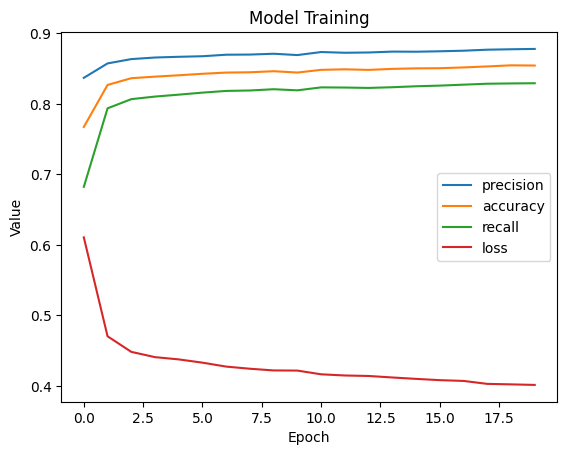

178/178 [==============================] - 0s 2ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               38528     
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 39,044
Trainable params: 39,044
Non-trainable params: 0
_________________________________________________________________


In [24]:
preds, classes = mlpClassifier(X_train, y_train, X_val, y_val, 'mlp1',128,'tanh')

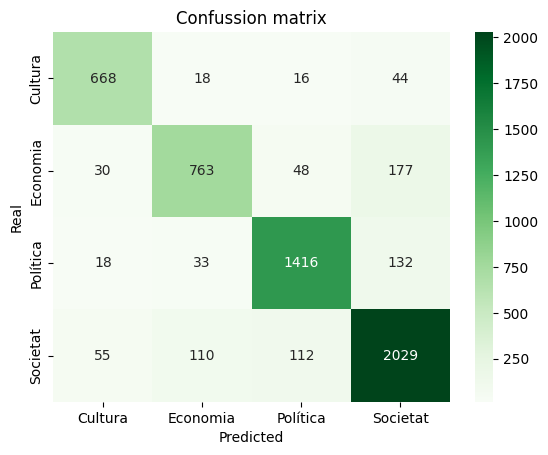

In [25]:
asign = {i: j for i, j in enumerate(classes)}
prediccions = []
for p in preds:
    prediccions.append(asign[p.argmax()])

import seaborn as sns
matriu_conf = confusion_matrix(y_val.T[0], prediccions)
cm = np.array(matriu_conf)

# Crear el mapa de calor
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=asign.values(), yticklabels=asign.values())
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confussion matrix")
plt.show()

Obenim resultats bastant bons. Cal mencionar que no utilitzem el test ja que no hem provat diferents paràmetres, ens quedem amb el resultat de la validation, utilitzada com a test ja que no hem fet tria de models ni de paràmetres